In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 전처리 전의 이미지 압축 파일 해제. 폴더가 존재하는 경우 건너뛴다

import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/Likenot_ML/bratabase_model.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Likenot_ML/bratabase_model')

# Resize 함수 설정: (256, 256)

In [ ]:
# 이미지의 비율을 유지하여 정사각형 이미지로 resize하는 함수

import cv2

def resize_image(img, resize_shape): # shape: 세로, 가로 길이가 같은 정사각형의 튜플
    y = img.shape[0] # 이미지의 세로 길이
    x = img.shape[1] # 이미지의 가로 길이

    if y < x: # 가로가 세로보다 길 경우 위, 아래에 여백을 추가한다
        img_border = cv2.copyMakeBorder(img, int((x-y)/2), int((x-y)/2), 0, 0, cv2.BORDER_REPLICATE)
    else: # 세로가 가로보다 길 경우 양 옆에 여백을 추가한다
        img_border = cv2.copyMakeBorder(img, 0, 0, int((y-x)/2), int((y-x)/2), cv2.BORDER_REPLICATE)

    # 정사각형의 이미지 img_border을 shape에 맞춰 resize한다   
    img_resized = cv2.resize(img_border, resize_shape, interpolation=cv2.INTER_AREA)

    return img_resized

# 이미지 윤곽선 추출
parameter 조정 필요

In [ ]:
!mkdir /content/drive/MyDrive/Likenot_ML/labelme_dataset/320
!mkdir /content/drive/MyDrive/Likenot_ML/labelme_dataset/320/images
!mkdir /content/drive/MyDrive/Likenot_ML/labelme_dataset/320/masks

In [ ]:
# 이미지 resize: (256, 256)
# 이미지 윤곽선 추출: GaussianBlur -> Canny:threshold1=30, threshold2=70

import os
import glob
import cv2
import numpy as np

img_list = glob.glob('/content/drive/MyDrive/Likenot_ML/labelme_dataset/JPEGImages/*') # 원본 이미지의 파일 리스트
mask_list = glob.glob('/content/drive/MyDrive/Likenot_ML/labelme_dataset/SegmentationClass/*')

for file in img_list:
    img_id = os.path.basename(file).split('.')[0]

    img = cv2.imread(file, 0)
    img_resized = resize_image(img, (320, 320))

    img_dst = '/content/drive/MyDrive/Likenot_ML/labelme_dataset/320/images/' + img_id + '.png'
    cv2.imwrite(img_dst, img_resized)

for npy in mask_list:
    mask_id = os.path.basename(npy).split('.')[0]

    npy_arr = np.load(npy)

    mask = np.zeros(npy_arr.shape)
    mask[np.where(npy_arr == 1)] = 1
    mask[np.where(npy_arr == 2)] = 2
    mask_resized = resize_image(mask, (320, 320))

    mask_dst = '/content/drive/MyDrive/Likenot_ML/labelme_dataset/320/masks/' + mask_id + '.png'
    cv2.imwrite(mask_dst, mask_resized)

In [ ]:
# 이미지 resize: (256, 256)
# 이미지 윤곽선 추출: GaussianBlur -> Canny:threshold1=30, threshold2=70

import os
import cv2

src_dir = '/content/drive/MyDrive/Likenot_ML/product_img/Bra_Image_edit' # !! 원본 이미지 폴더 경로 설정 !!
src_image_list = os.listdir(src_dir) # 원본 이미지의 파일 리스트

dst_dir = '/content/drive/MyDrive/Likenot_ML/product_img/resized_bra_image' # !! 윤곽선 이미지 저장할 폴더 경로 설정 !!
if not os.path.isdir(dst_dir):
    os.mkdir(dst_dir)

for file in src_image_list:
    src_path = src_dir + '/' + file
    img = cv2.imread(src_path, 0)

    resized_img = resize_image(img, (256, 256))
    dst_path = dst_dir + '/' + file
    cv2.imwrite(dst_path, resized_img)

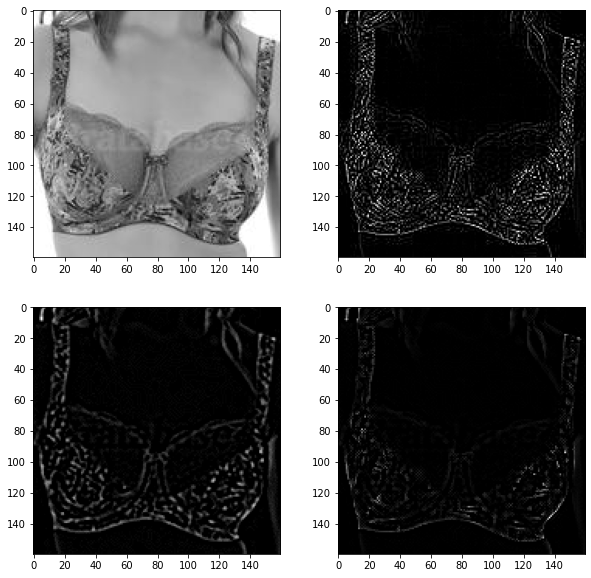

In [ ]:
import os
import cv2
import glob
import matplotlib.pyplot as plt

img_list = glob.glob('/content/drive/MyDrive/Likenot_ML/bratabase_model/*')

img = cv2.imread(img_list[10], 0)

gaussian = cv2.GaussianBlur(img, (5, 5), 0)
bilateral = cv2.bilateralFilter(img, 5, 75, 75)

canny = cv2.Canny(img, 30, 70)
laplacian = cv2.Laplacian(img, cv2.CV_8U)

gc = cv2.Canny(gaussian, 30, 70)
gl = cv2.Laplacian(gaussian, cv2.CV_8U)
bc = cv2.Canny(bilateral, 30 ,70)
bl = cv2.Laplacian(bilateral, cv2.CV_8U)

images = [img, laplacian, gl, bl]

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')

plt.show()